In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import dataPro;
from scipy.stats import chi2_contingency
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

x = dataPro.Data.dataClean()

In [37]:
#calcule des indicateurs de de tendance
import datetime
now = datetime.datetime.now()
moyPrix= x['price'].mean()
print("moyenne des prix: ",moyPrix)
medianPrix = x['price'].median()
print("la mediane des prix: ", medianPrix)
modePrix = x['price'].mode()
print("le mode des prix: ", modePrix) 
moyAge = x['birth'].mean()
print("moyenne des ages :",now.year-moyAge,'Ans')
medianPrix = x['birth'].median()
print("la mediane des ages: ", now.year-medianPrix, 'Ans')
modeAge = x['birth'].mode()
print("le mode des ages: ", now.year-modeAge) 

moyenne des prix:  17.215188513735296
la mediane des prix:  13.9
le mode des prix:  0    15.99
dtype: float64
moyenne des ages : 43.1764321543867 Ans
la mediane des ages:  41.0 Ans
le mode des ages:  0    41
dtype: int64


In [27]:
print ("Standard deviation");
print (x['price'].std());
print ("variance")
print(x['price'].var());
print ("interquartile range");
print (stats.iqr(x['price']));
print ("skewness");
print (x['price'].skew());

Standard deviation
17.855445377653318
variance
318.8169296343612
interquartile range
10.379999999999999
skewness
5.479196379351583


In [38]:
#To ease our work we processed dummies for the variable sex
pd.get_dummies(x, columns = ['sex'])
#We used one of the dummies columns by dropping the last
#m=1, and f=0
l = pd.get_dummies(x, columns = ['sex'], drop_first =True)

In [39]:
#gini and lorenz curve
dfm = l[l['sex_m'].isin(['price'])]
gini_lc = l.sort_values(by=['price'])
gini_lc['mm']=np.arange(1,len(gini_lc)+1)
x1 = gini_lc['mm']
#Substitute the cumulative value of G1 data for y
y = gini_lc['price'].cumsum()

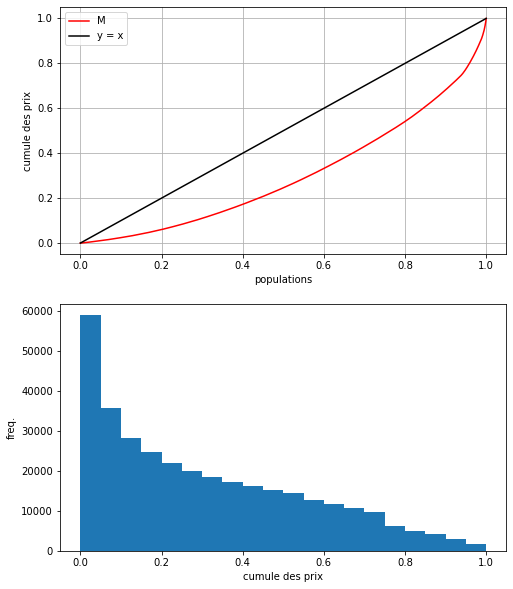

In [40]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))
ax1.plot(x1/max(x1),y/max(y),'red', label='M')
ax1.plot(x1/max(x1),x1/max(x1),'black', label = 'y = x')
ax2.hist(y/max(y), bins = 20, range =(0,1),label ='M')
ax1.set_xlabel('populations')
ax1.set_ylabel('cumule des prix')
ax2.set_ylabel('freq.')
ax2.set_xlabel('cumule des prix')
ax1.legend()
ax1.grid(True)
plt.show()

### population : pourcentage de nombre de ventes (article vendu)

## Etudier l'influence des clients professionnels (avec un grand nombre d'article acheté par an)

In [41]:
x

client_id sex  birth id_prod  price  categ                       date  \
0         c_4410   f   1967   1_385  25.99      1 2021-03-22 01:40:22.782925   
1         c_4410   f   1967  0_1110   4.71      0 2021-11-04 16:28:30.169021   
2         c_4410   f   1967  0_1111  19.99      0 2021-03-22 01:27:49.480137   
3         c_4410   f   1967   1_461  12.99      1 2021-08-11 08:40:47.495793   
4         c_4410   f   1967   1_536  11.21      1 2022-01-18 17:05:07.468131   
...          ...  ..    ...     ...    ...    ...                        ...   
336908      c_84   f   1982  0_1452  13.77      0 2021-09-20 10:11:35.510099   
336909      c_84   f   1982   1_158  22.17      1 2021-10-01 16:11:20.841361   
336910      c_84   f   1982  0_1438   9.31      0 2021-12-29 06:11:50.316631   
336911      c_84   f   1982   1_459  15.99      1 2022-02-17 00:16:56.629536   
336912      c_84   f   1982   1_110  54.90      1 2021-09-13 21:39:46.845376   

       session_id  
0          s_9707  
1        s_114715  
2          s_9707  
3         s_74236  
4        s_151740  
...           ...  
336908    s_92701  
336909    s_98493  
336910   s_141701  
336911   s_166337  
336912    s_89478  

[336713 rows x 8 columns]

In [42]:
#les achteurs qui'ont acheté plus d'articles
dfcount = pd.DataFrame({"Nombre d'articles acheté" : x.groupby([ "client_id"] ).size()}).reset_index()
dfcountPro = dfcount[dfcount["Nombre d'articles acheté"] > 2000]
dfcountPro


client_id  Nombre d'articles acheté
677     c_1609                     12855
2724    c_3454                      3273
4388    c_4958                      2562
6337    c_6714                      4471

In [43]:
dfMergesPro = pd.merge(dfcountPro, x, left_on='client_id', right_on='client_id')
dfMergesPro

client_id  Nombre d'articles acheté sex  birth id_prod  price  categ  \
0        c_1609                     12855   m   1980  0_1421  19.99      0   
1        c_1609                     12855   m   1980  0_1421  19.99      0   
2        c_1609                     12855   m   1980  0_1421  19.99      0   
3        c_1609                     12855   m   1980  0_1421  19.99      0   
4        c_1609                     12855   m   1980  0_1421  19.99      0   
...         ...                       ...  ..    ...     ...    ...    ...   
23156    c_6714                      4471   f   1968  0_1644   4.77      0   
23157    c_6714                      4471   f   1968  0_1644   4.77      0   
23158    c_6714                      4471   f   1968   1_331  55.99      1   
23159    c_6714                      4471   f   1968   1_331  55.99      1   
23160    c_6714                      4471   f   1968  0_1314  20.63      0   

                            date session_id  
0     2022-01-01 14:45:54.554094   s_143409  
1     2021-09-25 10:20:50.532681    s_95241  
2     2021-11-18 19:50:26.626338   s_121644  
3     2021-10-20 02:54:41.529641   s_107359  
4     2021-10-22 14:53:10.086160   s_108526  
...                          ...        ...  
23156 2021-10-30 09:32:15.128560   s_112206  
23157 2021-05-10 04:07:52.119744    s_32396  
23158 2021-08-01 12:08:46.215144    s_69943  
23159 2021-05-09 03:24:20.872655    s_31940  
23160 2021-04-22 04:20:14.784530    s_23977  

[23161 rows x 9 columns]

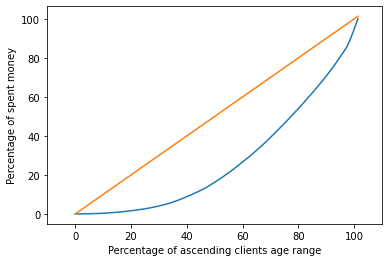

Text(0, 0.5, 'Total spent money')

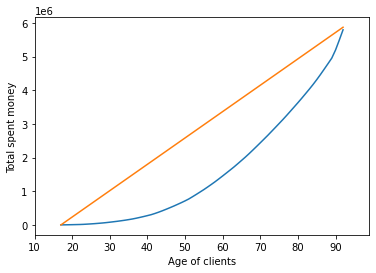

In [44]:
x["age"] = now.year - x["birth"]
g_age = x.groupby(['age'])
dep = g_age['price'].sum()
#dep = dep.sort_values()
n = len(dep)

lorenz0 = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz0) # La courbe de Lorenz commence à 0

plt.figure()
plt.xlim([-10,110])
xaxis = np.linspace(0,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis*100,lorenz*100)
plt.plot(xaxis*100,xaxis*100)
plt.xlabel('Percentage of ascending clients age range')
plt.ylabel('Percentage of spent money')

plt.show()
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

grouped_age = g_age.groups.keys()
plt.figure()
plt.xlim([10,99])
tot_spent = np.cumsum(np.sort(dep))
plt.plot(grouped_age,tot_spent)
xaxis0 = np.linspace(0,1+1/n,n) * dep.sum()
plt.plot(grouped_age,xaxis0)
plt.xlabel('Age of clients')
plt.ylabel('Total spent money')

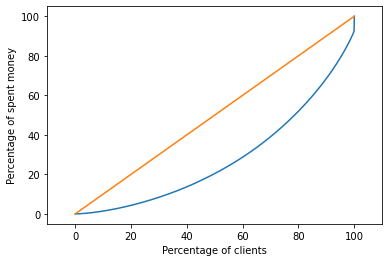

Text(0, 0.5, 'Total spent money')

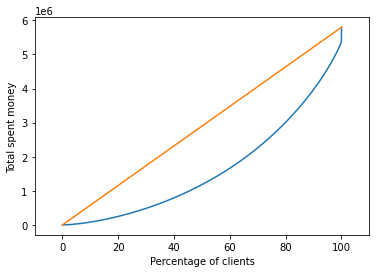

In [46]:
g_client = x.groupby('client_id')
dep = g_client['price'].sum()
dep = dep.sort_values()
n = len(dep)

lorenz0 = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz0) # La courbe de Lorenz commence à 0

plt.figure()
plt.xlim([-10,110])
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis*100,lorenz*100)
plt.plot(xaxis*100,xaxis*100)
plt.xlabel('Percentage of clients')
plt.ylabel('Percentage of spent money')
plt.show()
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini


plt.figure()
plt.xlim([-10,110])
tot_spent = np.cumsum(np.sort(dep))
xaxis0 = np.linspace(0,1+1/n,n) * dep.sum()
xaxis1 = np.linspace(0,1+1/n,n)
plt.plot(xaxis1*100,tot_spent)
plt.plot(xaxis1*100,xaxis0)
plt.xlabel('Percentage of clients')
plt.ylabel('Total spent money')

Text(0.5, 0, 'Mois')

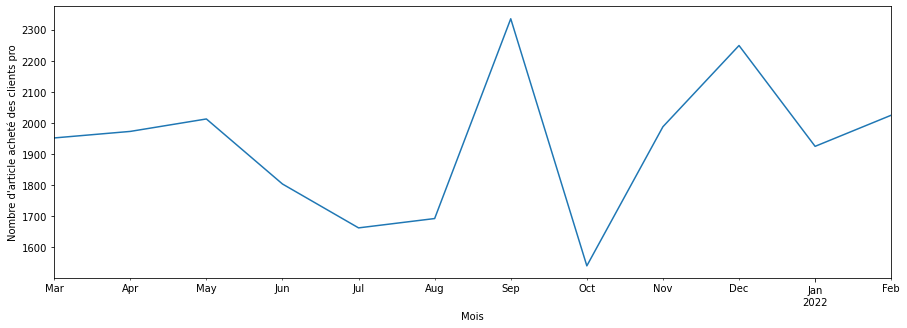

In [10]:
#plot montre l'achat des client pro par mois
yPro = pd.DatetimeIndex(dfMergesPro.date).to_period("M")
mPro =  dfMergesPro.groupby(yPro)
mPro.count()
plt.figure(figsize=(15, 5))
mPro['client_id'].count().plot()
plt.ylabel("Nombre d'article acheté des clients pro")
plt.xlabel("Mois")


Text(0.5, 0, 'Mois')

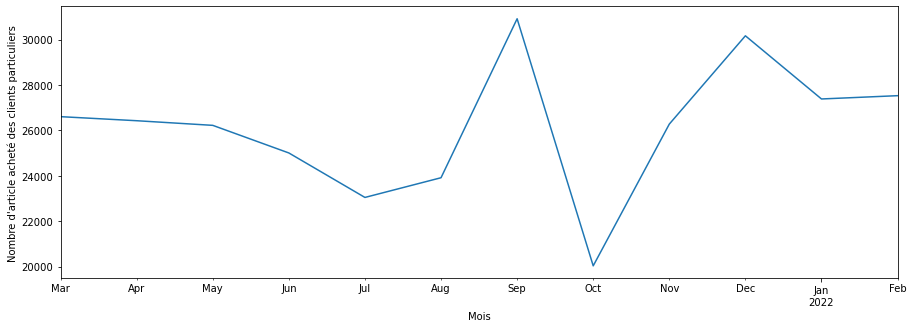

In [11]:
#Nombre d'achatacheté par les clients ordinaire
dfcountNotPro = dfcount[dfcount["Nombre d'articles acheté"] < 2000]
dfcountNotPro
dfMerges = pd.merge(dfcountNotPro, x, left_on='client_id', right_on='client_id')
dfMerges
ynotPro = pd.DatetimeIndex(dfMerges.date).to_period("M")
mNotPro =  dfMerges.groupby(ynotPro)
mNotPro.count()
plt.figure(figsize=(15, 5))
mNotPro['client_id'].count().plot()
plt.ylabel("Nombre d'article acheté des clients particuliers")
plt.xlabel("Mois")

Le nombre des articles achetés par clients particulers et pro suit la même tendance

## Variation de nombre d'achat au cours de l'année

<AxesSubplot:xlabel='date'>

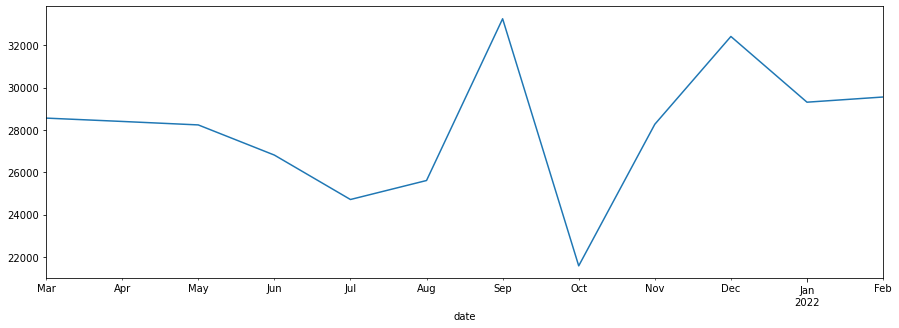

In [12]:
#nombre d'achat effectuer par toutes les clients par mois
y = pd.DatetimeIndex(x.date).to_period("M")
m =  x.groupby(y)
m.count()
plt.figure(figsize=(15, 5))
m['client_id'].count().plot()

Text(0.5, 0, 'Mois')

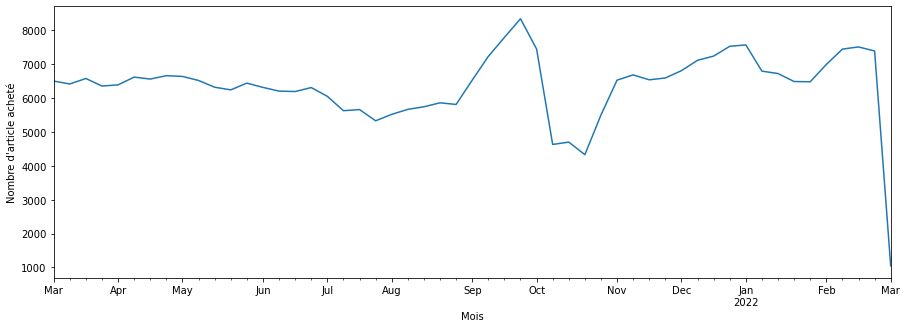

In [13]:
#nombre d'achat effectuerpar tout les clients par semaine
y = pd.DatetimeIndex(x.date).to_period("W")
w =  x.groupby(y)
w.count()
plt.figure(figsize=(15, 5))
w['client_id'].count().plot()
plt.ylabel("Nombre d'article acheté")
plt.xlabel("Mois")

On remarque qu'il y a une chute de nombre d'achat pour les 3 premières semaines d'octobre. Cela peut être lier à une perte de données ou une fermeture exceptionnel de la boutique.

In [4]:
x["age"] = now.year - x["birth"]
x;

In [73]:
pvc_grp = x.groupby(['categ', 'sex'], as_index=False).mean()
pvc_grp

categ sex        birth      price  z_score_prix        age
0      0   f  1977.744137  10.632127     -0.368687  43.255863
1      0   m  1978.454137  10.661271     -0.367055  42.545863
2      1   f  1973.622798  20.513377      0.184716  47.377202
3      1   m  1975.074872  20.446097      0.180948  45.925128
4      2   f  1995.656780  74.794105      3.224731  25.343220
5      2   m  1996.818554  75.513495      3.265020  24.181446

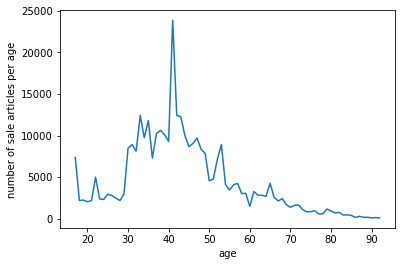

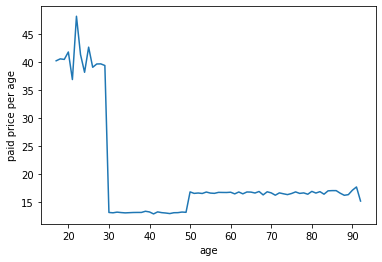

In [128]:
#fig, (ax3,ax4) = plt.subplots(2, 1)
g_age = x.groupby(['age'])
ax1 = plt.figure()
ax1=g_age['age'].count().plot(ylabel = 'number of sale articles per age')
ax2 = plt.figure()
ax2=g_age['price'].mean().plot(ylabel = 'paid price per age')

In [123]:
#calcule de IQR
Q1 = np.percentile(x['price'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(x['price'], 75, interpolation = 'midpoint') 
Q = Q3-Q1
Q

10.379999999999999

In [124]:
low_lim = Q1 - 1.5 * Q
up_lim = Q3 + 1.5 * Q
print('la limite la plus bas est:', low_lim)
print('la limite la plus haute est:', up_lim)

la limite la plus bas est: -6.959999999999999
la limite la plus haute est: 34.559999999999995


C:\Users\Joe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


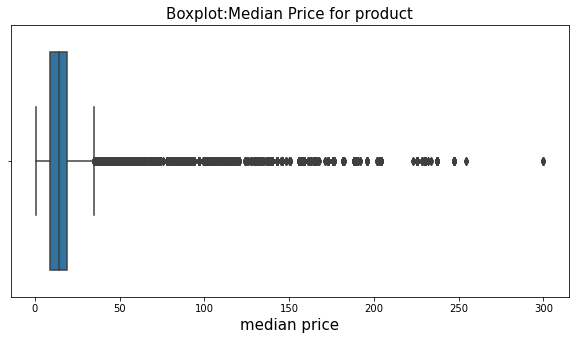

In [163]:
pic = plt.figure(figsize =(10, 5))
sns.boxplot(x.price)
plt.title('Boxplot:Median Price for product', fontsize =15)
plt.xlabel('median price', fontsize =15)
plt.show()

<AxesSubplot:>

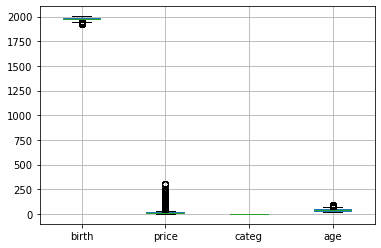

In [34]:
x.boxplot()


La boite à moustache indique un dianede prix égale à ~17 euros, et considère les articles ayant des prix supérieur à 45 euros comme des outl iers

In [1]:
#extraire les outliers du prix de notre dataframe
"""
outlier =[]
for i in x['price']:
    if ((i> up_lim) or (i<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)
mn = x[x.price < up_lim]
print(mn)
sns.boxplot(mn['price'])
"""

"\noutlier =[]\nfor i in x['price']:\n    if ((i> up_lim) or (i<low_lim)):\n         outlier.append(x)\nprint(' outlier in the dataset is', outlier)\nmn = x[x.price < up_lim]\nprint(mn)\nsns.boxplot(mn['price'])\n"

On remarque qu'il y a une chute de nombre d'achat pour les 3 premières semaines d'octobre. Cela peut être lier à une perte de données ou une fermeture exceptionnel de la boutique.

# Evolution de l'age des clients avec leur achat :
## les clients plus jeunes achètent des moins d'articles que les autres tranches d'age
## Par conte les jeunes dépensent en moyenne plus d'argent -> les jeunes achètent les articles les plus chères
## les figures, sans les clients pro, monte que les pro ont un age de 40 ans, et ils n'influent pas les autres classe d'age

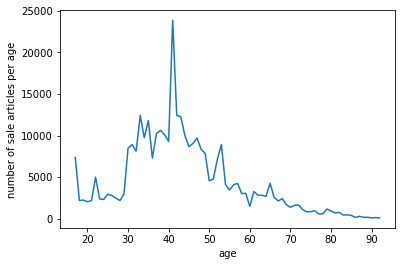

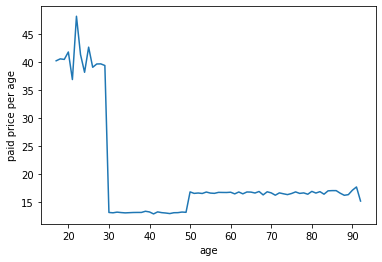

In [162]:
g_ageOut = x.groupby(['age'])
ax1 = plt.figure()
ax1=g_ageOut['age'].count().plot(ylabel = 'number of sale articles per age')
ax2 = plt.figure()
ax2=g_ageOut['price'].mean().plot(ylabel = 'paid price per age')

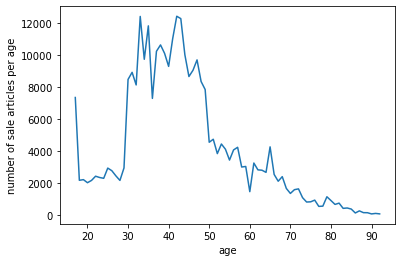

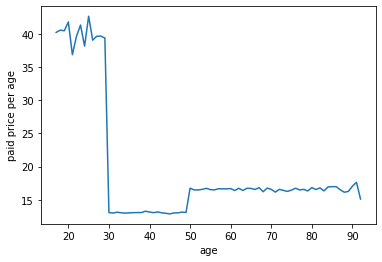

In [161]:
g_ages = dfMerges.groupby(['age'])
ax1 = plt.figure()
ax1=g_ages['age'].count().plot(ylabel = 'number of sale articles per age')
ax2 = plt.figure()
ax2=g_ages['price'].mean().plot(ylabel = 'paid price per age')

<AxesSubplot:>

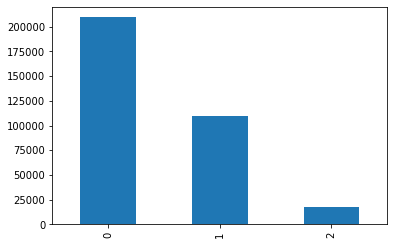

In [164]:
x['categ'].value_counts().plot.bar()

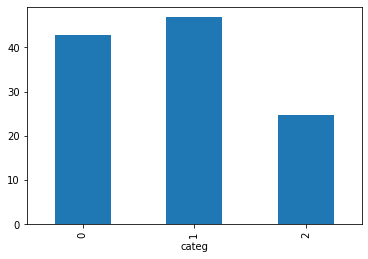

In [31]:
g_ages = dfMerges.groupby(['categ'])
ax2 = plt.figure()
ax2=g_ages['age'].mean().plot.bar()

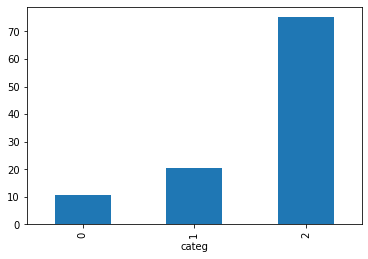

In [33]:
g_ages = dfMerges.groupby(['categ'])
ax2 = plt.figure()
ax2=g_ages['price'].mean().plot.bar()

In [91]:
pvc_test = dfMerges[['categ', 'sex', 'price']]
pvc_grp = pvc_test.groupby(['categ', 'sex'], as_index=False).count()
pvc_grp
gbs = pvc_grp.pivot(index= 'sex', columns='categ')
gbc = pd.DataFrame(gbs).reset_index()
gbc["total"] = gbc["price"].sum()
gbc.loc["Total"] = gbc.sum()
gbc.append(gbc.sum().rename('Total'))
gbs



price             
categ       0      1     2
sex                       
f      101148  53774  8122
m       94023  48851  7634

In [92]:
# defining the table
data = [gbs]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print("stat value is " + str(stat))
print("dof value is " + str(dof))
print("expected value is " + str(expected))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0060893822533516695
stat value is 10.202417277273174
dof value is 2
expected value is [[[101487.02774659  53364.00501352   8192.96723988]
  [ 93683.97225341  49260.99498648   7563.03276012]]]
Dependent (reject H0)


# #Résultat de chi-2 montre qu'il peut avoire une dépendance entre l'age et la categorie,  c'est-à-dire que les deux variables ont une relation significative.

In [113]:
pvc_test = dfMerges[['age', 'price']]
pvc_grp= pvc_test.groupby(['age'])["price"].sum()
pvc_grp
gba = pd.DataFrame(pvc_grp).reset_index()
gba

age      price
0    17  295387.98
1    18   88461.39
2    19   89910.02
3    20   84881.48
4    21   80099.92
..  ...        ...
71   88    2632.02
72   89    2586.09
73   90    1432.92
74   91    2028.35
75   92    1300.03

[76 rows x 2 columns]

In [117]:
# defining the table
data = gba
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
print("stat value is " + str(stat))
print("dof value is " + str(dof))
print("expected value is " + str(expected))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
stat value is 42147.722999417936
dof value is 75
expected value is [[2.27987631e+02 2.95176992e+05]
 [6.82866162e+01 8.84111034e+04]
 [6.94054115e+01 8.98596146e+04]
 [6.55252571e+01 8.48359547e+04]
 [6.18357169e+01 8.00590843e+04]
 [7.45054104e+01 9.64626146e+04]
 [7.51387175e+01 9.72825613e+04]
 [6.78994914e+01 8.79098905e+04]
 [9.68591435e+01 1.25404131e+05]
 [8.38043859e+01 1.08502056e+05]
 [7.52256354e+01 9.73950944e+04]
 [6.65097782e+01 8.61106202e+04]
 [8.96573024e+01 1.16079863e+05]
 [8.55682426e+01 1.10785732e+05]
 [8.96109262e+01 1.16019819e+05]
 [8.24660038e+01 1.06769244e+05]
 [1.25065994e+02 1.61923714e+05]
 [9.76958224e+01 1.26487384e+05]
 [1.18940330e+02 1.53992780e+05]
 [7.35847618e+01 9.52706452e+04]
 [1.03330943e+02 1.33783209e+05]
 [1.07343403e+02 1.38978167e+05]
 [1.03665764e+02 1.34216704e+05]
 [9.44298428e+01 1.22258900e+05]
 [1.11201523e+02 1.43973298e+05]
 [1.26344139e+02 1.63578536e+05]
 [1.23574058e+02 1.59992096e+05]
 [1.00362283e+02 1.29939668

In [125]:
stats.pearsonr(gba["age"],gba["price"])

(-0.8277604829272744, 2.9736599918920876e-20)

In [127]:
sns.scatterplot(x=stats.pearsonr(gba["age"]), y=stats.pearsonr(gba["price"]))

TypeError: pearsonr() missing 1 required positional argument: 'y'